In [1]:
import numpy as np

optimal_reward_time = np.load("optimal_reward_time_greedy.npy")

In [2]:
optimal_reward_time

array([42.86268068, 26.91843437, 37.49709176, 54.74474121, 32.13150284,
       51.082744  , 51.082744  , 45.71715508, 42.86268068, 42.86268068,
       54.74474121, 21.20948557, 51.082744  , 54.74474121, 45.71715508,
       42.86268068, 54.74474121, 33.58724507, 37.74494124, 57.5992156 ,
       40.35156616, 45.71715508, 37.49709176, 30.73277067, 28.22165614,
       51.082744  , 42.86268068, 38.95283399, 51.082744  , 54.74474121,
       35.23382672, 45.71715508, 33.58724507, 40.35156616, 45.96500456,
       31.07613054, 51.082744  , 37.49709176, 36.44171946, 42.86268068,
       33.58724507, 37.49709176, 32.37935232, 42.86268068, 45.96500456,
       28.22165614, 37.49709176, 45.71715508, 28.22165614, 54.74474121,
       31.07613054, 45.96500456, 40.35156616, 42.86268068, 51.082744  ,
       38.95283399, 37.49709176, 33.58724507, 28.22165614, 54.74474121,
       45.71715508, 37.49709176, 37.49709176, 28.22165614, 49.62700177,
       40.59941564, 42.86268068, 54.74474121, 37.74494124, 45.71

In [3]:
import numpy as np
import os

# List of file names
file_paths = [
    "Y_t_exp_time-ada-lasso-stochastic-bandit-under-inter-n5-k9-d55-s10_10times.npy",
    "Y_t_exp_time-lasso-stochastic-bandit-under-interference-n5-k9-d55-s10_10times.npy",
    "Y_t_exp_time-linear-stochastic-bandit-under-interference-n5-k9-d55-s10_10times.npy",
    "Y_t_exp_time-ete-under-interference-n5-k9-d55-s10_10times.npy"
]


# Initialize a dictionary to store the results
cumulative_regret_data = {}

# Process each file
for file_path in file_paths:
    if os.path.exists(file_path):
        # Load the original data (assumed to be 10 runs x T rounds format)
        data = np.load(file_path)  # Shape: (10, T)

        # Calculate instant regret (difference from the constant value)
        instant_regret = np.maximum(optimal_reward_time - data, 0)  # Shape: (10, T)

        # Calculate cumulative regret by taking the cumulative sum along axis=1
        cumulative_regret = np.cumsum(instant_regret, axis=1)  # Shape: (10, T)

        # Store the result
        cumulative_regret_data[file_path] = cumulative_regret

        print(f"Processed file: {file_path}")
    else:
        print(f"File not found: {file_path}")

# Save cumulative regret data as new .npy files
for file_path, cumulative_regret in cumulative_regret_data.items():
    output_file = file_path.replace(".npy", "_cu.npy")
    np.save(output_file, cumulative_regret)
    print(f"Cumulative regret saved to: {output_file}")


Processed file: Y_t_exp_time-ada-lasso-stochastic-bandit-under-inter-n5-k9-d55-s10_10times.npy
Processed file: Y_t_exp_time-lasso-stochastic-bandit-under-interference-n5-k9-d55-s10_10times.npy
Processed file: Y_t_exp_time-linear-stochastic-bandit-under-interference-n5-k9-d55-s10_10times.npy
Processed file: Y_t_exp_time-ete-under-interference-n5-k9-d55-s10_10times.npy
Cumulative regret saved to: Y_t_exp_time-ada-lasso-stochastic-bandit-under-inter-n5-k9-d55-s10_10times_cu.npy
Cumulative regret saved to: Y_t_exp_time-lasso-stochastic-bandit-under-interference-n5-k9-d55-s10_10times_cu.npy
Cumulative regret saved to: Y_t_exp_time-linear-stochastic-bandit-under-interference-n5-k9-d55-s10_10times_cu.npy
Cumulative regret saved to: Y_t_exp_time-ete-under-interference-n5-k9-d55-s10_10times_cu.npy


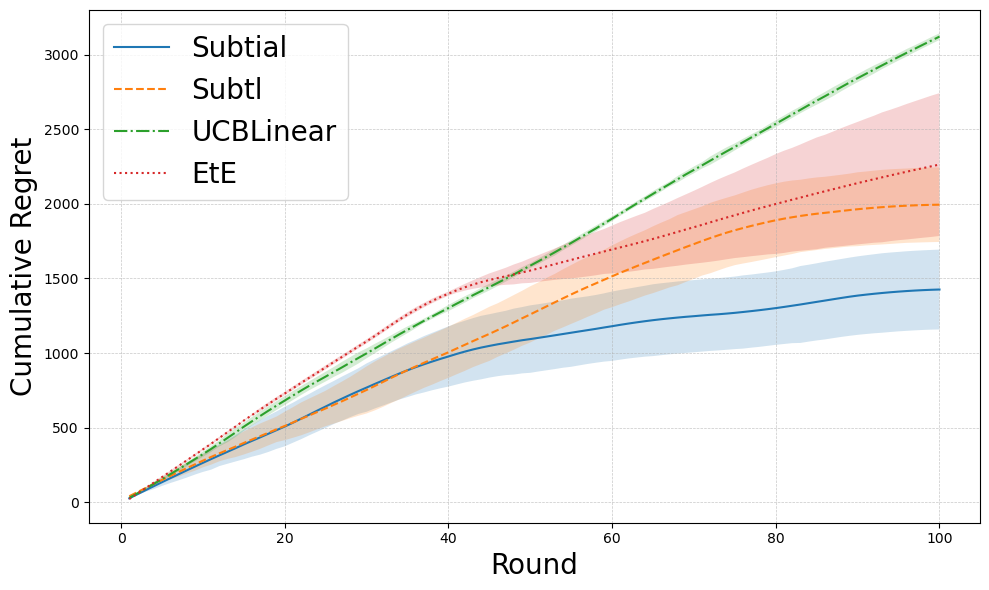

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

# List of cumulative regret file names and corresponding labels
file_paths = [
    "Y_t_exp_time-ada-lasso-stochastic-bandit-under-inter-n5-k9-d55-s10_10times_cu.npy",
    "Y_t_exp_time-lasso-stochastic-bandit-under-interference-n5-k9-d55-s10_10times_cu.npy",
    "Y_t_exp_time-linear-stochastic-bandit-under-interference-n5-k9-d55-s10_10times_cu.npy",
    "Y_t_exp_time-ete-under-interference-n5-k9-d55-s10_10times_cu.npy"
]

custom_labels = [
    "Subtial",
    "Subtl",
    "UCBLinear",
    "EtE"
]

# Define line styles for each label
line_styles = ['-', '--', '-.', ':']  # Solid, dashed, dash-dot, dotted

# Dictionary to store mean and standard deviation
mean_std_data = {}

# Function to read and process each file
def process_files():
    for file_path, label in zip(file_paths, custom_labels):
        if os.path.exists(file_path):
            # Load cumulative regret data (assumed to be 10 runs x T rounds format)
            cumulative_regret = np.load(file_path)  # Shape: (10, T)

            # Compute mean and standard deviation for each round (axis=0)
            mean_data = np.mean(cumulative_regret, axis=0)
            std_data = np.std(cumulative_regret, axis=0)

            # Smooth the data
            window_size = min(20, 30)
            if window_size % 2 == 0:
                window_size += 1
            poly_order = 2  # Polynomial order
            smoothed_mean_data = savgol_filter(mean_data, window_size, poly_order)

            # Store in the dictionary
            mean_std_data[label] = (smoothed_mean_data, std_data)
        else:
            print(f"File not found: {file_path}")

# Call the processing function
process_files()

# Plot the results
plt.figure(figsize=(10, 6))

# Use line styles for different methods
for (label, (mean_data, std_data)), linestyle in zip(mean_std_data.items(), line_styles):
    time_steps = range(1, len(mean_data) + 1)
    # Plot the mean line with custom linestyle
    plt.plot(time_steps, mean_data, label=label, linestyle=linestyle)
    # Fill the 95% confidence interval
    lower_bound = mean_data - 1.96 * (std_data / np.sqrt(10))  # Assuming 10 runs
    upper_bound = mean_data + 1.96 * (std_data / np.sqrt(10))
    plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)

# Set title and labels
plt.xlabel("Round",fontsize=20)
plt.ylabel("Cumulative Regret",fontsize=20)
#plt.title("$n=5, k=9, d=55, s_0=10$")  # LaTeX-style title

# Add grid and legend
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(fontsize=20)
plt.tight_layout()

# Show the plot
plt.show()
